<a href="https://colab.research.google.com/github/y-oth/dst_assessment2/blob/main/report/IntroGrad_CAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Grad-CAM

Grad-CAM is a method for providing explanations for Convolutional Neural Networks [1]. Grad-CAM produces a heatmap of the regions in an image that are the most relevant in the classification decision of the CNN. Grad-CAM does this by working out the gradients of the model's classification score with respect to the feature maps that are produced in the final convolutional layer, this reveals which parts of an image the model 'thinks' is why a specific image is in a specific class.

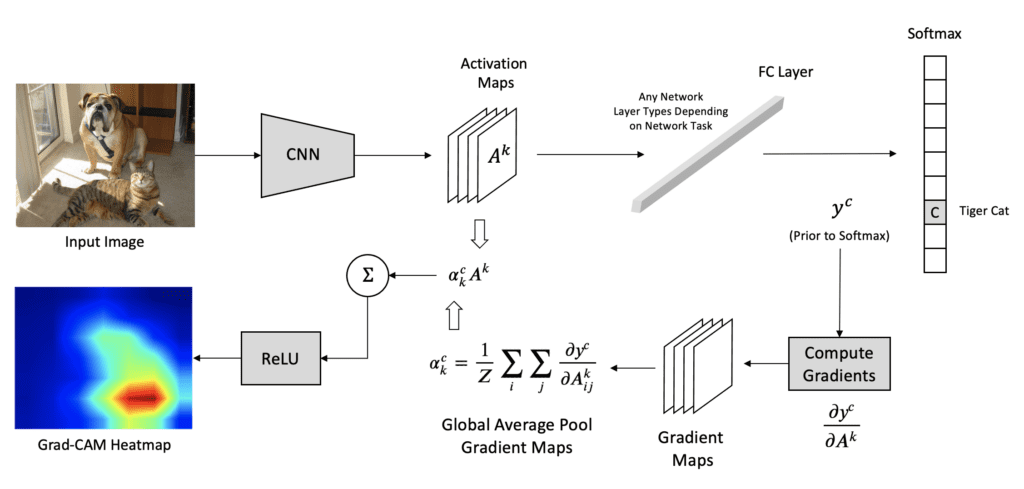


The figure above [2] gives the high-level overview of the steps:



1. **Forward pass Image**
First we pass the image through the CNN to get feature maps of the last convolutional layer (labled as Activation maps) in the CNN architecture and the outputs (logits) of the neural network (labled as $y^c$ just before the softmax function maps to a classification). The $k$-th feature map is denoted as $\mathbf{A}^k$ and represents one specific feature inside a convolutional layer.

2. **Select class and calculate score**
For the image we have inputted, we choose which class $c$ we want to explain. For example, in our tumor classification task if we choose $c =$ no tumor, then we want to see why the neural network might think the inputted image is in class $c$. We take the score for class $c$, denoted by $y^c$ (the output for class $c$ before the softmax function is applied).

3. **Compute score gradient**
For each feature $k$ in the last last layer of the convolutional layer, we compute the gradient of the score for class $c$, $y^c$ with respect to the $k$th feature map $\mathbf{A}^k$. In particular, we compute:
 $$ \sum_{i}\sum_{j} \frac{\delta y^c}{\delta A_{ij}^{k}}$$
Where $A_{ij}$ is the $i,j$th pixel of the feature map $A^k$.
Next, we normalise this gradient by the number of pixels $Z$ in order to get a sort of global average of each filter $k$. We get the scalar weight:
$$ \alpha_{k}^{c} = \frac{1}{Z}\sum_{i}\sum_{j} \frac{\delta y^c}{\delta A_{ij}^{k}}$$ which can be viewed as the *importance* of each filter $k$.

4. **Sum all feature maps**
To calculate the final Grad-CAM importance map we take the linear combination of the importance weight $\alpha_{k}^{c}$ and the feature map of each feature $k$:
$$\sum_{k}\alpha_{k}^{c}\mathbf{A}^{k}$$
We then apply a ReLU activation function to keep only the regions that positively influnece the target class.
$$L^{c}_{Grad-CAM} = ReLU(\sum_{k}\alpha_{k}^{c}\mathbf{A}^{k})$$

5. **Upsample**
We then resize the original Grad-CAM map $L^{c}_{Grad-CAM}$, which is of the same dimensions as the filter $\mathbf{A}^k$, to the same dimensions as the input image so that it can be overlayed on the image. We then overlay the Grad-CAM map onto the image using a heatmap. To do this, we use bilinear interpolation [3] which helps us map pixels in the original image of larger dimension to pixels (or more accurately regions) in the Grad-CAM activation map.


## References
[1]Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization
Ramprasaath R. Selvaraju, Michael Cogswell, Abhishek Das, Ramakrishna Vedantam, Devi Parikh, Dhruv Batra

[2] https://xai-tutorials.readthedocs.io/en/latest/_model_specific_xai/Grad-CAM.html

[3]https://x-engineer.org/bilinear-interpolation/